> ###Practical 3
> By: Ties van Rozendaal
> - Student-nr. 10077391

# Practical 3 How to classify pixels?
## <font color='green'>[+100 points in total, +30 optional points]</font>

# Section 1 Introduction

This assignment contains several files that need to be completed/implemented. This Jypyter notebook serves only as a "glue", to connect everything together and let you run the code more easily. If you want to run a particular file, you just need to type in a standard code cell the following
```lua
dofile 'mynewfile.lua'
```
and it will run your code as if you would type that in the terminal.

The rest of this notebook will describe the assignment, present to you the questions that you need to complete and guide you through through the answer.
You should not use this notebook to actually program the code for the assignment, other than calling "main" files to get, print and plot the results.
You should provide the textual as well as the numerical answers inline, after each question by running the right scripts that you should have implemented.
Once you complete the assignment and answer the questions inline, you can download the report in pdf (File->Download as->PDF) and send it to us, together with the code.

To share your code, results and pdf with us, please make a Bitbucket repository and invite us to your project.
Then, we will clone your project and correct your assigmment.

<i>Note: You are not obliged to use iTorch, you can also run the code in the terminal.
Whatever suits you best.
Plotting images and graphs is easier with iTorch, however.
You might want to save the images and have them plotted in iTorch.</i>

In [1]:
model_opt = {}
print '=== A. LOAD DATA ==='
dofile 'load_data_cifar10.lua'
trainData, testData = load_data_cifar10()

------------------------------------------------------
print '=== B. PREPROCESS DATA ==='
dofile 'preprocess_data_cifar.lua'
trainData, testData = preprocess_data_cifar(trainData, testData)

=== A. LOAD DATA ===	


Training Data:	
{


  data : ByteTensor - size: 50000x3x32x32
  label : ByteTensor - size: 50000
}

Test Data:	
{
  data : ByteTensor - size: 10000x3x32x32
  label : ByteTensor - size: 10000
}

==> visualizing data	
training data:	


test data:	


=== B. PREPROCESS DATA ===	


==> Normalize data to uniform distribution.	


==> Verifying the statistics of the data	


training data, r-channel, mean: 4.3395769407653e-08	
training data, r-channel, standard deviation: 0.99999997756505	
test data, r-channel, mean: 0.011393703589095	
test data, r-channel, standard deviation: 0.99846289991241	


training data, g-channel, mean: 6.7139436987418e-09	
training data, g-channel, standard deviation: 1.0000000185661	
test data, g-channel, mean: 0.012210118618786	
test data, g-channel, standard deviation: 0.99756514680714	


training data, b-channel, mean: -5.4413030738942e-08	
training data, b-channel, standard deviation: 0.99999996706243	
test data, b-channel, mean: 0.014825474738312	
test data, b-channel, standard deviation: 1.0000173474507	


# Instructions

Implement your code and answer all the questions.
Make your own bitbucket repository (bitbucket allows private repositories).
Commit your answers to the repository and invite us to access your solutions.
Please send your answers by the 3rd of March, at 11.59.
In the course there is a 7 late day policy.
This means that you are allowed 7 days in total for delivering the assignments, you can use them as you please.
Beyond that each extra late day will have a 10% penalty on your final score.

# Summary

By the end of this practical you should:
<ul>
<li>be able to implement your very own, state-of-the-art deep convolutional neural network, like Alexnet.</li>
<li>be able to visualize filters and feature maps of convolutional neural networks.</li>
<li>be able to use a neural network as a feature extractor to compute features, that can later on be used with an SVM.</li>
<li>be able to fine-tune an existing neural network for a new dataset. You will learn how to pick the right hyper-parameters for the fine-tuning.</li>
</li>
</ul>

# Section 2 Build your Convnet

The first part of this assignment is to build your very own first convoluional neural network.
From a programming point of view defining a convolutional neural network is not much different that defining a standard neural network (multi-layer perceptron) that you did for the second practical.
Although you can reuse the code from the second practical, the starter code of this practical now has two improvements.
First, the code is more structured and general making it easier for heavy experimentation.
Second, the code allows for harvesting your GPU power to speed up computations.
Using your GPU to train deep learning neural networks is a <i>sine qua non</i> condition for modern architectures and datasets.

In Torch transforming your code to work with GPU and CUDA is almost transparent. In short it can be summarized to the following: import the cunn package (<tt>require 'cunn'</tt>), set the default tensor to be the CudaTensor (<tt>torch.setdefaulttensortype('torch.CudaTensor')</tt>), although this might also cause some problems depending on the rest of your code and you could avoid, and transfer your model in the GPU, namely:

```lua
require 'cunn'

torch.setdefaulttensortype('torch.CudaTensor')

model = nn.Sequential()
model:add(nn.Copy('torch.FloatTensor','torch.CudaTensor'):cuda())
model:add(alexnet_model():cuda())
```

<i>Note: Obviously, when moving to the GPU you might observe some issues in the beginning.
If you experience problems, please post a question in Piazza.</i>

## Section 2.1 Implement the functions for loading and pre-processing your data

The dataset that we are going to work with in this section is <a href="https://www.cs.toronto.edu/~kriz/cifar.html">CIFAR-10</a>.
This is a dataset composed of 50,000 training and 10,000 testing color images of spatial resolution $32\times32$.

Your main wrapper function for this section is <tt>assignment3-cifar10.lua</tt>.
First, you need to implement the functions <tt>load_data_cifar10.lua</tt> and <tt>preprocess_data_cifar10.lua</tt>.
You can reuse the code you used in the previous lab assignment.
After pre-processing the data should be following a Gaussian distribution of $N(0, 1)$ per color channel.
If you didn't manage to get it right last week, please send me an email to work this out.

### <font color='green'>Question A.1 [+10 points]</font>

<font color='green'>Once you have implemented the function for loading, you need to implement the function that defines your model.
Open the file <tt>define_alexnet_model_cifar10.lua</tt>.
Implement an Alexnet-like model.
The architecture should be composed of the following modules:
<ul>
<li>Convolutional module: input depth 3 (RGB), output depth 96, filter width and height 5, name id 'conv1'</li>
<li>ReLU module, name  'relu1'</li>
<li>Max pooling module: filter width and height 2, name id 'pool1'</li>
<li>Convolutional module, output depth 256, filter width and height 5, name id 'conv2'</li>
<li>ReLU module, name id 'relu2'</li>
<li>Max pooling module: filter width and height 2, name id 'pool2'.</li>
<li>Convolutional module: output depth 384, filter width and height 3, name id 'conv3'</li>
<li>ReLU module (name id 'relu3')</li>
<li>Convolutional module: output depth 384, filter width and height 3, name id 'conv4'</li>
<li>ReLU module (name id 'relu4')</li>
<li>Convolutional module: output depth 256, filter width and height 3, name id 'conv5'</li>
<li>ReLU module (name id 'relu5')</li>
<li>Max pooling module: filter width and height 2, name id 'pool5'.</li>
<li>View module that vectorizes its input: name id 'view5'.</li>
<li>Dropout module: probability of droput 0.5, name id 'dropout6'.</li>
<li>Linear module which implement an inner product/fully connected layer: output dimensionality of 4096, name id 'linear6'.</li>
<li>ReLU module (name id 'relu6')</li>
<li>Dropout module: probability of droput 0.5, name id 'dropout7'.</li>
<li>Linear module: output dimensionality of 1024, name id 'linear7'.</li>
<li>ReLU module (name id 'relu7')</li>
<li>Dropout module: probability of droput 0.5, name id 'dropout8'.</li>
<li>Linear module, which is the final layer that returns the unnormalized class scores (normalized after Softmax): output dimensionality of 10, name id 'linear8'.</li>
</ul></font>

This is an Alexnet-like model, because some layers and weights are different.
For one, we do not use spatial contrast normalization layers, which are by now deprecated.
Also, the output is of dimension 10 instead of 1,000, since we have 10 classes.

To make the model implementation a bit easier, we have (almost) provided you the first convolutional layer.
You need to insert the rest of the modules yourself. 
Please, add the names of the modules also.
This is not required by Torch to run your network.
However, it will make your life easier when analyzing your network or when you do debugging.

To have a complete implementation of the network architecture you need to define some hyper-parameters.
The pictures are small, hence we want to have a dense stride of 1 for the row and column directions.
We want the output (feature maps) of the convolutional modules to have the same size as their input.
For that how much zero-padding should we consider for each of the convolutional modules?
Also, we want the feature maps of the pooling modules to have half the size of their input.
What should the stride for the max pooling be?

> The size and stride for the pooling should be 2 for both dimensions. This will halve the input in each dimension.

### <font color='green'>Question A.2 [+10 points]</font>

<font color='green'>What is the correct zero-padding value for each of the convolutional module? What is the stride for the max pooling modules? Write and motivate these values here and also in your file.</font>

> As the height and widht are the same, I will talk about size. Using the formula $(f_{size}-1)/2$:
> For the convolutional filter of size 5, the padding is 2 and $f_3=1$

### <font color='green'>Question A.3 [+10 points]</font>

<font color='green'>After you have implemented the model, you should run your experiment on CIFAR-10.
Use a learning rate of 1.0 and train for 30 epochs.
The training curve should look something like the figure below.
Plot your accuracy and loss curves in the training and test set.
If you would remove the dropout modules, what is the difference?
</font>

<i>Note: If your have a problem because your computer too slow, please contact me.</i>

<img src="images/learning1.png">

In [2]:
require 'analyze_model'
compare_models({'alexnet_cifar10A1'},true)

> If you would remove the dropout modules, the network would overfit more. After around 40 epochs, we see the performance and loss on the test-data converge, whereas the training-performance increases. Witouth the dropout, we will expect performance on the test-set to actually decrease while the model adapts to the noise in the training set.

A design choice that often has a strong influence on the final performance is the learning rate and the learning rate schedule.
There are many different choices and there is no correct choice, one just needs to try different strategies and pick the best performing one.

### <font color='green'>Question A.4 [+10 points]</font>
<font color='green'>
Add a "step" learning rate schedule, where the learning rate decreases after a prespecified number of epochs.
You can add this as an if statement in the beginning of the <tt>train_epoch</tt> function.
Implement this so that the learning rate is divided by 10 after the 50, 100, 150, 200, 250 epochs.
Plot your accuracy and loss curves in the training and test set.
Do you observe any difference and at what epoch?
What is the difference with when the learning rate was constant?</font>

<font color='green'>
Add a batch normalization module after your modules that contain trainable parameters, namely the convolutional layers and the inner product (fully connected) layers (except for the last, fully connected output layer).
Turn off the learning step schedule and re-train.
Is there any difference in the learning?
Turn back on the learning step schedule and re-train.
Is there any difference in the learning?
Explain your observations.</font>


In [9]:
-- Todo: anwers
compare_models({'alexnet_cifar10A4-1','C-alexnet_cifar10A4-2','C-alexnet_cifar10A4-3'},true,{'LR-schedule','batch-norm','batch-norm + schedule'})

> For the first model, as expected, after 50 epochs we see an effect of the learning rate schedule. The convergence is a lot slower, and as the model starts to overfit at this point, this is a good thing. We see a nice convergence of the loss on the test set, whereas this would increase witouth the learning rate schedule (in the previous model).

> Indeed, when we turn of the schedule, the model starts to overfit as well, as seen by increased loss in the test-datasat. When we reintroduce the learning rate schedule, the loss on the test-set goes down again. I would not expect this, but rather expect a convergence. However it might be due to the newly introduced batch normalisation.


### <font color='green'>Question A.5 [+10 points]</font>

<font color='green'>Find the top 10 per layer strongest feature maps for two classes in CIFAR-10 (pick two randomly) and paste the results here.
To do so, for each image within a class compute the $\ell_2$ norm per feature map per layer.
Find which are the top 10 feature maps with the largest $\ell_2$ norms for the class images.
Visualize these feature maps and indicate which module and filter number are they coming from.
What do you observe for the feature maps of different modules, do they look the same?
If yes, why?
If no, why?
Are there particular pixel structures that some filters seem to specializes on?
To make the visualization more concise, you can concatenate the images of the feature maps to fit one column per layer, thus having a $10\times\#num\_layers$ mega-picture for each class.</font>


Results for class 8	


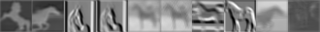

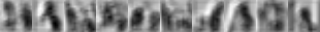

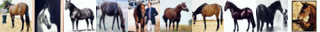

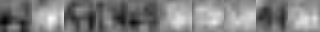

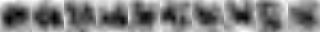

Results for class 9	


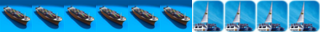

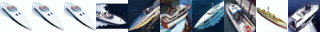

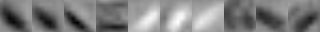

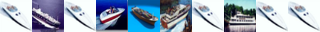

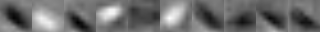

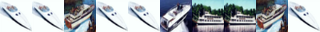

In [5]:
topClassTables = torch.load('data/featureMaps-10A1.t7')
model          = torch.load('data/alexnet_cifar10A1.net')
classes = {8, 9}

for _, class in pairs(classes) do

    print("Results for class " .. class)
    plotFeatureMaps(model, topClassTables[class])
    
    --print the feature IDs
    --layer = 5
    --print(topClassTables[class][layer])

end

> For both classes, the first two convolutional layers seem to represent edge detection. The higher layers in de boat class seem to specialize on diagonal lines, this may be due to the perspective of the images of boats in the training data.

> For the horses class, the higher modules seem to specialize on some structure in the middle of the image. This may be the body of the horse.

> For both classes, the top-feature maps in the first two modles originate from the same filter. This indicates that these modules are involved in basic image features. In Higher modules, the top-feature maps originate from different filters, indicating that in these layers, the filters start to specialize on specific class-features.

# Section 3 Transfer Learning

By now you should have trained a pretty accurate Alexnet-like convnet on CIFAR-10.
Assume now that you found a new dataset with even more classes, CIFAR-100.
For all the experiments from now on you train your networks for 30 epochs only.
If you did not manage to train your CIFAR-10 network for 300 epochs for the previous question because your computer is not strong enough, please contact me.

### <font color='green'>Question B.1 [+5 points]</font>
<font color='green'>Repeat the work for the previous section to train an Alenxnet-like network for CIFAR-100.
For convenience, write new files for the CIFAR-100 dataset, and change the respective variables and functions there.
Use again a learning rate of 1.0.
Train your network for the CIFAR-100 dataset for 30 epochs this time.
Plot your accuracy and loss curves in the training and test set.</font>

In [10]:
compare_models({'alexnet_cifar100B1'},true)

We just trained a new network from scratch for our new dataset CIFAR-100.
However, we had already trained a network for CIFAR-10.
So, a good assumption could be that this pre-trained network could be of some use for CIFAR-100 also.

As discussed in the lecture, there are two way we can re-use the existing, pretrained network for our new dataset.
First, we can use the weights of the pre-trained as an initialization for our new network for the new dataset.
This method would replace, therefore, the random initialization. The second method would be to use the existing, pre-trained network as a feature extractor.

## Section 3.1 Fine-tuning an existing, pre-trained network

This first method of re-using the existing network is often referred to as fine-tuning.
To fine-tune the pre-trained network we need to replace the random initialization of the new network with the weights of the existing network.
Instead of using the one that you trained earlier, you can also use the network from http://isis-data.science.uva.nl/egavves/alexnet_cifar10.net, which was trained for 300 epochs, achieving an accuracy of 84% on the test set.

### <font color='green'>Question B.2 [+10 points]</font>

<font color='green'>Open the <tt>setup_model.lua</tt> file.
Implement the function <tt>initializeNetWithNet</tt>.
Note that you initialize the modules of the new networks with the weights of the respective modules from the pre-trained network.
Note also, that the last layer cannot be initialized with the pretrained network, as we have more classes, which are also different ones.
Hence, for this last module you need to initialize it randomly, as you did for your earlier experiments.
To detect what is the last module, you can use the name id that you have defined earlier.
Make sure you have initialized the network correctly, by computing the sum of difference for the respective modules in the two networks.
The differences should be 0, except for the last module that is randomly initialized.
Paste the results here.</font>

In [7]:
opt                 = {}
opt['save']         = 'data/'
print '=== C. DEFINE MODEL ==='
dofile 'define_alexnet_model_cifar.lua'
model   = define_alexnet_model_cifar(100)

------------------------------------------------------
print '=== D. INITIALIZE MODEL ==='
dofile 'setup_model.lua'
model   = initializeNetWithNet(model, 'alexnet_cifar10A1')

=== C. DEFINE MODEL ===	


=== D. INITIALIZE MODEL ===	


Layer conv1:	


 > Norm of differences: Weight=0 Bias=0	
 > Norm: Weight=5.8043690626731 Bias=0.94738687036876	


Layer conv2:	


 > Norm of differences: Weight=0 Bias=0	


 > Norm: Weight=11.230259533089 Bias=0.64134850416873	


Layer conv3:	


 > Norm of differences: Weight=0 Bias=0	


 > Norm: Weight=15.784921532759 Bias=0.47123956572495	


Layer conv4:	


 > Norm of differences: Weight=0 Bias=0	


 > Norm: Weight=18.5766931503 Bias=0.34052199982179	


Layer conv5:	


 > Norm of differences: Weight=0 Bias=0	


 > Norm: Weight=18.440328754871 Bias=0.12746160939327	


Layer linear6:	


 > Norm of differences: Weight=0 Bias=0	


 > Norm: Weight=40.826498133393 Bias=0.35413115833638	
Layer linear7:	


 > Norm of differences: Weight=0 Bias=0	


 > Norm: Weight=20.907572347802 Bias=0.24820778109733	
Layer linear8:	


 > Norm: Weight=10.014756106429 Bias=0	


### <font color='green'>Question B.3 [+5 points]</font>

<font color='green'>Run the same experiment as for question B.1 using a learning rate 1.0.
Repeat the same experiment using now a learning rate of 0.1.
Plot your accuracy and loss curves in the training and test set for the two settings.
What do you observe and why?
</font>

In [11]:
compare_models({'alexnet_cifar100B3-1', 'alexnet_cifar100B3-2'},true,{'LR=1.0','LR=0.1'})

> With the learning rate of 1.0, the model trains very fast, and reaches higher values than the network that was initialised randomly. However, the model starts to overfit after 20 epochs, resulting in decreasing test performance. 

> With a learning rate of 0.1, the model trains very slow, and it is uncleary what performance will be reached. (Though this will likely be the same as with the learning rate of 1.0 because the learning rate is the same for all modules).

Next, we want to try fine-tuning, where we use a different learning rate per module.
For this you can use the function <tt>setupLearningRateVector</tt> inside the <tt>setup_model.lua</tt> file.
This function should return a vector of the same dimensionality as the number of trainable parameters in your network, as returned by the function
```lua
parameters, grad_parameters = model:getParameters()
```
Each element in the returned vector should specify the initial learning rate of each module parameters (or even each parameter individually, although this is not really necessary).
This vector should be stored in the optimization state variable with the name <tt>learningRates</tt>.

### <font color='green'>Question B.4 [+10 points]</font>

<font color='green'>Open the <tt>setup_model.lua</tt> file and implement the remaining of the function <tt>setupLearningRateVector(.)</tt>.
For all the modules initialized by the pretrained network set a learning rate of 0.1.
For all the modules initialized randomly set a learning rate of 1.0.
Train again the network for CIFAR-100.
Plot your accuracy and loss curves in the training and test set.
Compare to the results from question B.1 and B.3.
What do you observe and why?
</font>

In [12]:
compare_models({'C-alexnet-finetuning'},true)

> Unfortunately, this learning rate vector results in very slow learning. The results seem comparable with the network above, using a learning rate of 0.1 for the entire network. This indicates that the convolutional layers really need to adapt to the new dataset, and that the feature detectors in these layers are not fitted for the cifar 100 dataset. 

> In our case, the finetuning gives no advantage, as the network learns slow, and is also overfitting. 

### <font color='green'>Question B.5 [+5 points]</font>

<font color='green'>Open the sgd function from the optim package.
What is the relation between the learning rate and the learningRates variable in this particular implementation?
Are they independent or do they relate to each other?
What happens to the learningRates vector when the learning rate is halved, assuming there is no decay Explain why.
</font>

> The learningrates vector is multiplied by the following constant
 ```lua
 clr = lr / (1earning_rate + epoch_no*learning_rate_decay)
 ```
 
> Assuming that there is no decay, this means that the learning rate vector is muliplied by the scalar learning rate. Hence, when the learning rate is halved, then so will the learning rate vector.

### <font color='green'>Question B.6 [+5 points]</font>

<font color='green'>Repeat the visualization from question A.4.
Is there any noticeable difference from the previous results?</font>

Results for class 8	


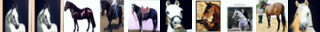

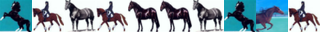

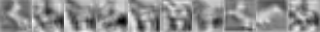

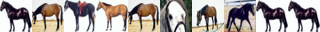

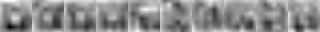

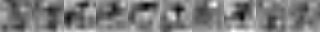

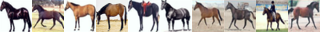

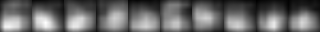

Results for class 9	


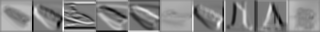

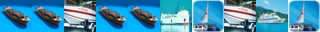

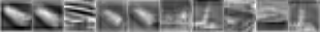

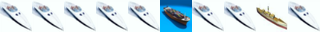

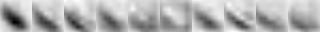

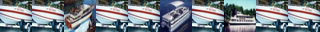

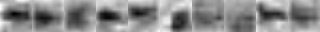

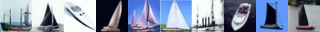

In [10]:
topClassTables = torch.load('data/featureMaps-10B3-1.t7')
model          = torch.load('data/alexnet_cifar100B3-1.net')
classes = {8, 9}

for _, class in pairs(classes) do

    print("Results for class " .. class)
    plotFeatureMaps(model, topClassTables[class])
    
    --print the feature IDs
    --layer = 5
    --print(topClassTables[class][layer])

end

> In order for a better comparison, I used the cifar10 data to compute the strongest per-class featuremaps. 
it seems that the strongest filters in the first two modules of the network are even more sensitive to edges than is the case in the cifar-10 model (for both classes).

> Furthermore the last convolutional layer is opposite than was the case with the cifar-10 model. In this model, the activiation is centered around the location of the object (usually, around the centre). For the cifar-10 model, the activation was realy low at the location of the object, and stronger in the background. 

> However, because of the fully conected layers after this layer, this may be a triviality, as a negative sign can easily flip this around in the upcomming layers.


## Section 3.2 Using an existing, pre-trained network as a feature extractor

Instead of fine-tuning, one could also directly use the existing, pre-trained network as a feature extractor.
More specifically, one could use the feature maps that specific modules as the representation for that image.
Then, one could run an external classifier, such SVM, on these representations.

### <font color='green'>Question B.7 [+10 points]</font>

<font color='green'>Start from the CIFAR-10 network.
Apply it on the CIFAR-100 images.
For each of the images compute and store separately the feature maps after the <tt>conv5</tt>, <tt>relu5</tt>, <tt>pool5</tt>, <tt>linear6</tt>, <tt>relu6</tt>, <tt>linear7</tt>, <tt>relu7</tt>, <tt>linear8</tt> modules.
Run an SVM on these features and report the accuracy on the test set.
What module is the best as a feature extractor and what could be a reason?
Does the combination (via concatenation) of the top two module representation improve the accuracy?</font>

<i>Note: To compute the SVM classifier on the features you can use the package from https://github.com/koraykv/torch-svm</i>.


> The torch-SVM class mentioned above is not easily extendible to a multiclass-SVM so I used the linear SVM in pythons scykit learn package.

> <img src="images/SVM_scores.png">

> Interestingly enough, the lower features work better for the linear SVM. When the features of the 'conv5' layer are used, performance approaches that of the neural net (around 40% on test set). However, results quickly get worse, and from the 'linear6' layer, the SVM even cannot reach a high accuracy on the training set. A non-linear SVM will probabebly work better here.

# <font color='purple'>Section 4 For enthusiastic students [Optional, +30 points]</font>

By now you should be able to build a decent, deep neural networks that scores good accuracies in a standard benchmark, like CIFAR-100.
However, one can probably do better.
Maybe a different type of network would be more suited, one that is wider or one that has more layers.
Maybe different types of hyperparameters would be better suited.
Maybe a combination of neural networks would do the trick or even maybe a combination with other methods would be beneficial.

In this third lab assignment we introduce the following object classification challenge. You can continue working on the classification task for the CIFAR-100 dataset.
This challenge is open-ended and does not have the same deadline as the rest of the assignment.

## <font color='purple'>Instructions and Conditions</font>

<ul>
<li>The deadline for this challenge is the final lecture, where we are going to present the winner.</li>
<li>The winner will receive extra points (+30 points) and a badge of honor.</li>
<li>The names of the participants and the winner will also be posted on the course website for the generations to come :P.</li>
<li>For questions and suggestions (the challenge is still open for changes, if good suggestions are proposed) use Piazza.</li>
</ul>

<i>Note: You are free to use any type of architecture and model, as long as substantial part of your method involves also a deep neural network.<i>
